In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# from keras.datasets import mnist
# from keras.utils import np_utils
# from keras import models
# from keras import layers
# from tensorflow.keras import optimizers
# from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import seaborn as sns
#import tensorflow as tf
from scipy.signal import butter, lfilter, freqz
from scipy.ndimage import gaussian_filter

Just the importation of the necessary library 

In [3]:
df = pd.read_csv("data/corpus_students_only_validated_targets.csv")
# df.head()
display(df)

,Unnamed: 0,subjectId,tgt_number,timestamp,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,...,tgtRemapYaw,elbRemapPosRefShouX,elbRemapPosRefShouY,elbRemapPosRefShouZ,wriRemapPosRefElbX,wriRemapPosRefElbY,wriRemapPosRefElbZ,handRemapPosRefWriX,handRemapPosRefWriY,handRemapPosRefWriZ
0,0,10,0,0.021321,-0.207269,-0.139305,0.590163,-1.124028,0.437425,-0.172744,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
1,1,10,0,0.032686,-0.208174,-0.139678,0.590870,-1.123488,0.437940,-0.172283,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
2,2,10,0,0.043437,-0.208109,-0.139475,0.590799,-1.123379,0.438620,-0.171821,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
3,3,10,0,0.055584,-0.208239,-0.139492,0.591435,-1.123350,0.438833,-0.171277,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
4,4,10,0,0.065655,-0.208122,-0.139372,0.591197,-1.123311,0.438889,-0.170947,...,-3.125513,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881694,881694,32,4898,1043.704224,-0.374607,-0.729790,0.162881,-1.857293,-0.983636,0.043440,...,-3.127899,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881695,881695,32,4898,1043.714966,-0.375450,-0.729012,0.163776,-1.857483,-0.985459,0.043212,...,-3.127986,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881696,881696,32,4898,1043.727051,-0.375700,-0.727945,0.164108,-1.858276,-0.984668,0.044183,...,-3.128112,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791
881697,881697,32,4898,1043.738403,-0.375495,-0.727270,0.163958,-1.859209,-0.984431,0.043964,...,-3.128213,-0.0,-0.31992,0.0,-0.0,-0.25112,0.0,0.032366,-0.075465,-0.016791


Reading of the Data 

In [4]:
df_sorted = df[['subjectId','tgt_number','shPitch', 'shRoll','armYaw','elbPitch','forearmYaw','wriPitch','wriRoll','handRemapPosX','handRemapPosY','handRemapPosZ','handRemapPitch','handRemapRoll']]
display(df_sorted)

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
0,10,0,-0.207269,-0.139305,0.590163,-1.124028,0.437425,-0.172744,-0.316933,0.104115,-0.427305,0.341101,0.291809,-0.746049
1,10,0,-0.208174,-0.139678,0.590870,-1.123488,0.437940,-0.172283,-0.316804,0.104262,-0.427390,0.341057,0.292196,-0.745820
2,10,0,-0.208109,-0.139475,0.590799,-1.123379,0.438620,-0.171821,-0.316609,0.104394,-0.427472,0.341001,0.292807,-0.746017
3,10,0,-0.208239,-0.139492,0.591435,-1.123350,0.438833,-0.171277,-0.316134,0.104292,-0.427450,0.341244,0.292540,-0.747592
4,10,0,-0.208122,-0.139372,0.591197,-1.123311,0.438889,-0.170947,-0.315781,0.104338,-0.427519,0.341210,0.292919,-0.748280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881694,32,4898,-0.374607,-0.729790,0.162881,-1.857293,-0.983636,0.043440,-0.143309,-0.087936,-0.090415,0.363713,0.081177,0.159412
881695,32,4898,-0.375450,-0.729012,0.163776,-1.857483,-0.985459,0.043212,-0.143321,-0.087603,-0.090137,0.364029,0.080878,0.159761
881696,32,4898,-0.375700,-0.727945,0.164108,-1.858276,-0.984668,0.044183,-0.143792,-0.087456,-0.089809,0.364092,0.080799,0.161681
881697,32,4898,-0.375495,-0.727270,0.163958,-1.859209,-0.984431,0.043964,-0.144698,-0.087387,-0.089646,0.364047,0.080749,0.164148


In [5]:
df_sorted.describe()

,subjectId,tgt_number,shPitch,shRoll,armYaw,elbPitch,forearmYaw,wriPitch,wriRoll,handRemapPosX,handRemapPosY,handRemapPosZ,handRemapPitch,handRemapRoll
count,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000,881699.000000
mean,16.822035,2503.625896,-1.024488,-0.675578,0.628316,-1.413000,-0.520585,0.173741,-0.249950,-0.100597,-0.002894,0.388386,0.040098,-0.283023
std,10.570966,1426.703044,0.634952,0.322153,0.526829,0.451152,0.586334,0.328264,0.310954,0.188778,0.199470,0.086133,0.657416,0.553919
min,3.000000,0.000000,-3.141206,-1.560359,-3.131141,-2.504906,-2.136223,-0.973747,-1.440078,-0.605567,-0.552436,0.072709,-3.133529,-1.560990
25%,8.000000,1245.000000,-1.460757,-0.908679,0.276654,-1.761895,-0.946560,-0.056298,-0.449309,-0.237241,-0.156831,0.324470,-0.453118,-0.691979
50%,13.000000,2538.000000,-0.980412,-0.693729,0.652485,-1.453277,-0.576468,0.185986,-0.260402,-0.097061,-0.015434,0.383093,0.048770,-0.331340
75%,29.000000,3737.000000,-0.560550,-0.456886,0.984462,-1.087090,-0.143582,0.402535,-0.064193,0.036210,0.141803,0.450925,0.528736,0.092558
max,32.000000,4898.000000,3.139107,0.501621,3.128223,-0.019562,1.622628,1.327301,1.401464,0.445426,0.564953,0.622726,3.138423,1.530193


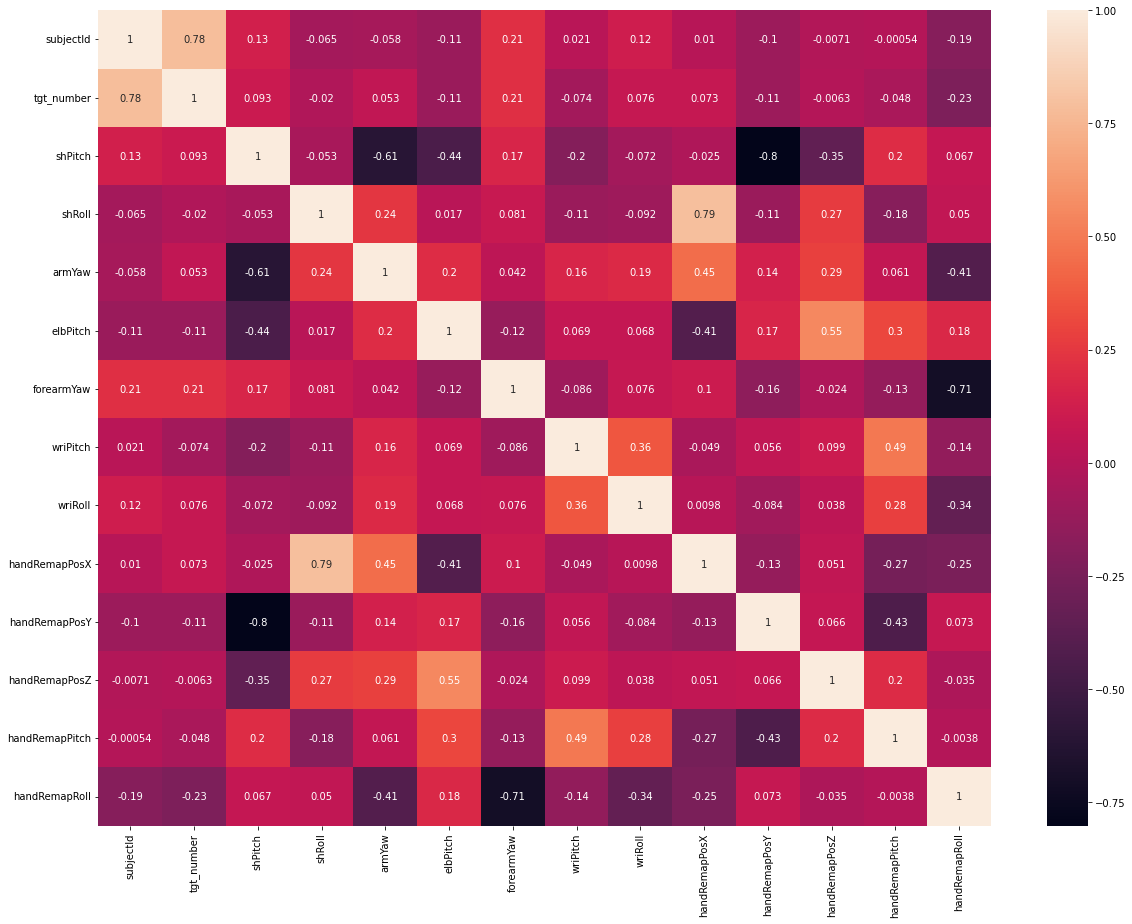

In [6]:
corr_matrix = df_sorted.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

We take here just the 9Hz of the previous data file sorted, be careful, the index is changing 10 by 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88170 entries, 0 to 881690
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subjectId       88170 non-null  int64  
 1   tgt_number      88170 non-null  int64  
 2   shPitch         88170 non-null  float64
 3   shRoll          88170 non-null  float64
 4   armYaw          88170 non-null  float64
 5   elbPitch        88170 non-null  float64
 6   forearmYaw      88170 non-null  float64
 7   wriPitch        88170 non-null  float64
 8   wriRoll         88170 non-null  float64
 9   handRemapPosX   88170 non-null  float64
 10  handRemapPosY   88170 non-null  float64
 11  handRemapPosZ   88170 non-null  float64
 12  handRemapPitch  88170 non-null  float64
 13  handRemapRoll   88170 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 9.4 MB


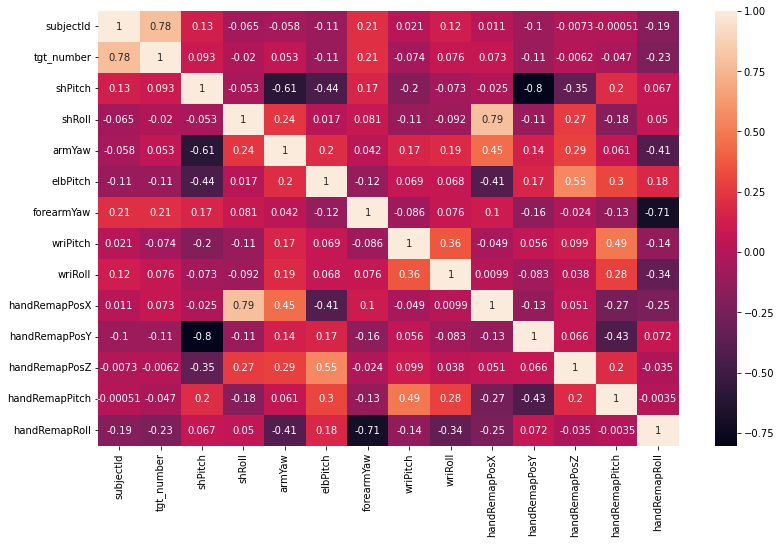

In [7]:
df_tri=df_sorted.iloc[::10,:]
df_tri.info()
corr_df = df_tri.corr() #Correlation pour verifier avec les données completes
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

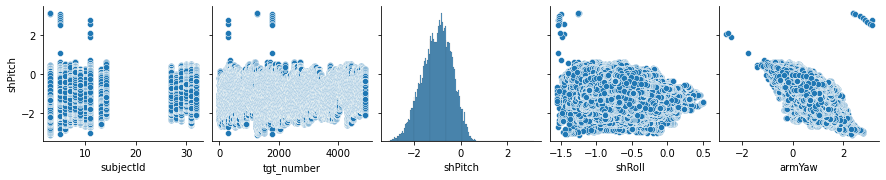

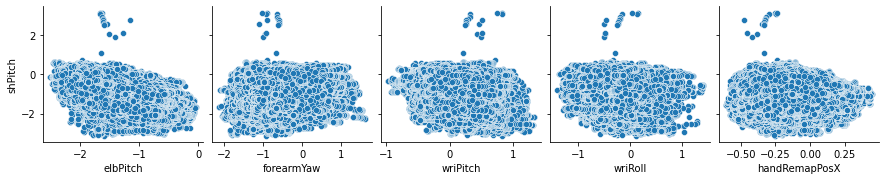

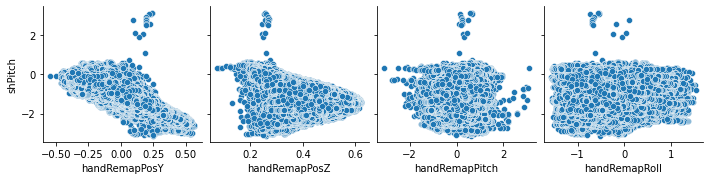

In [8]:
for i in range(0, len(df_tri.columns), 5):
    sns.pairplot(data=df_tri,
                x_vars=df_tri.columns[i:i+5],
                y_vars=['shPitch'])

See here the difference between sorted each 9Hz compare to 90Hz

In [ ]:
for i in range(0, len(df_sorted.columns), 5):
    sns.pairplot(data=df_sorted,
                x_vars=df_sorted.columns[i:i+5],
                y_vars=['shPitch'])

Latest Data is df_df

Sorte de seuillage d'histogramme

In [9]:
df_df = df_tri[df_tri['shPitch'] < 1 ]
df_df = df_df[df_df['handRemapPitch'] < 2 ]
df_df = df_df[df_df['handRemapPitch'] > -2 ]
df_df = df_df[df_df['handRemapPosZ'] > 0.15 ]

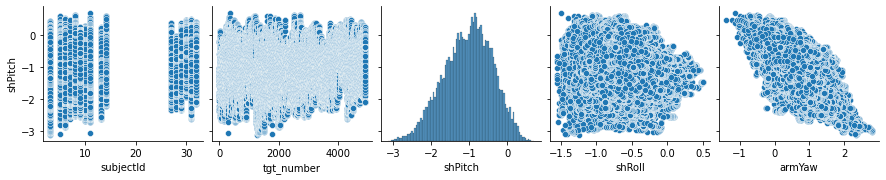

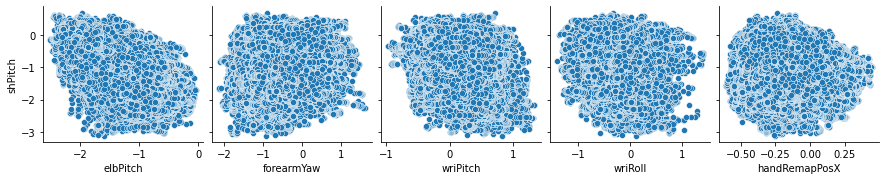

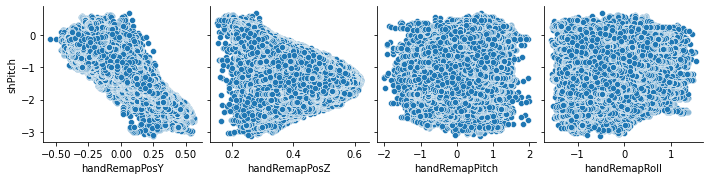

In [10]:
for i in range(0, len(df_df.columns), 5):
    sns.pairplot(data=df_df,
                x_vars=df_df.columns[i:i+5],
                y_vars=['shPitch'])

On peut voir ici que les données aberrantes sont enlevés